In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, confusion_matrix, matthews_corrcoef, accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector

In [2]:
data = pd.read_csv("data_predspracovane.csv", sep = ",")

In [3]:
#Funkcia na vykonanie krokovej regresie
data_sample = data.sample(n=50000, random_state=8391)

# Definícia funkcie pre forward selection s AUC
def selection_auc(data_sample, target_column, forward, type):
    X = data_sample.drop(columns=[target_column])
    y = data_sample[target_column]
    feature_selector = SequentialFeatureSelector(LogisticRegression(max_iter = 1000000),
                                                 k_features='best',
                                                 forward=forward,
                                                 scoring='roc_auc')
    feature_selector.fit(X, y)
    selected_features = list(X.columns[list(feature_selector.k_feature_idx_)])
    print(f"{type}: {selected_features}")
    return selected_features

In [4]:
selected_features_forward_auc = selection_auc(data_sample, 'nebezpecenstvo', True, "FORWARD")
selected_features_backward_auc = selection_auc(data_sample, 'nebezpecenstvo', False, "BACKWARD")

FORWARD: ['den_v_tyzdni', 'cas', 'stat', 'kilometer', 'mesto', 'pricina_nehody', 'druh_nehody', 'typ_dialnice', 'miesto_nehody', 'lokacia_dialnice', 'celkovy_pocet_zranenych']
BACKWARD: ['rok', 'cas', 'stat', 'kilometer', 'mesto', 'pricina_nehody', 'druh_nehody', 'faza_dna', 'sklon_vozovky', 'typ_dialnice', 'miesto_nehody', 'lokacia_dialnice', 'pocet_vozidiel', 'celkovy_pocet_zranenych', 'pocet_neuvedenych']


In [15]:
#vsetky atributy
x = data.drop("nebezpecenstvo",axis=1)

#atributy metodou postupneho pridavania
x_f = data[['den_v_tyzdni','cas','stat','kilometer','mesto','pricina_nehody','druh_nehody','typ_dialnice','miesto_nehody','lokacia_dialnice','celkovy_pocet_zranenych']]

#atrubuty metodou postupneho odstranovania
x_b = data[['rok','cas','stat','kilometer','mesto','pricina_nehody','druh_nehody','faza_dna','sklon_vozovky','typ_dialnice','miesto_nehody','lokacia_dialnice','pocet_vozidiel','celkovy_pocet_zranenych','pocet_neuvedenych']]

y = data['nebezpecenstvo']
x_train_f,x_test_f,y_train,y_test = train_test_split(x_f,y,test_size=0.3,stratify=y,random_state=8391)
x_train_b,x_test_b,y_train,y_test = train_test_split(x_b,y,test_size=0.3,stratify=y,random_state=8391)
x_train,x_test,y_train,y_test = train_test_split(x_b,y,test_size=0.3,stratify=y,random_state=8391)

K - najbližších susedov

In [19]:
model_KNN = KNeighborsClassifier().fit(x_train, y_train)
y_pred_KNN = model_KNN.predict(x_test)

model_KNN_f = KNeighborsClassifier().fit(x_train_f, y_train)
y_pred_KNN_f = model_KNN_f.predict(x_test_f)

model_KNN_b = KNeighborsClassifier().fit(x_train_b, y_train)
y_pred_KNN_b = model_KNN_b.predict(x_test_b)

auc_KNN = roc_auc_score(y_test, y_pred_KNN)
print(f"AUC pre KNN: {auc_KNN:.5f}")

auc_KNN_f = roc_auc_score(y_test, y_pred_KNN_f)
print(f"AUC pre KNN_f: {auc_KNN_f:.5f}")

auc_KNN_b = roc_auc_score(y_test, y_pred_KNN_b)
print(f"AUC pre KNN_b: {auc_KNN_b:.5f}")

AUC pre KNN: 0.98466
AUC pre KNN_f: 0.98493
AUC pre KNN_b: 0.98466


Logistická regresia

In [18]:
model_LR = LogisticRegression(max_iter = 1000000).fit(x_train, y_train)
y_pred_LR = model_LR.predict(x_test)

model_LR_f = LogisticRegression(max_iter = 1000000).fit(x_train_f, y_train)
y_pred_LR_f = model_LR_f.predict(x_test_f)

model_LR_b = LogisticRegression(max_iter = 1000000).fit(x_train_b, y_train)
y_pred_LR_b = model_LR_b.predict(x_test_b)

auc_LR = roc_auc_score(y_test, y_pred_LR)
print(f"AUC pre LR: {auc_LR:.3f}")

auc_LR_f = roc_auc_score(y_test, y_pred_LR_f)
print(f"AUC pre LR_f: {auc_LR_f:.3f}")

auc_LR_b = roc_auc_score(y_test, y_pred_LR_b)
print(f"AUC pre LR_b: {auc_LR_b:.3f}")

AUC pre LR: 0.575
AUC pre LR_f: 0.576
AUC pre LR_b: 0.575


Naivný Bayesov klasifikátor

In [70]:
model_NB = GaussianNB().fit(x_train, y_train)
y_pred_NB = model_NB.predict(x_test)

model_NB_f = GaussianNB().fit(x_train_f, y_train)
y_pred_NB_f = model_NB_f.predict(x_test_f)

model_NB_b = GaussianNB().fit(x_train_b, y_train)
y_pred_NB_b = model_NB_b.predict(x_test_b)

auc_NB = roc_auc_score(y_test, y_pred_NB)
print(f"AUC pre NB: {auc_NB:.5f}")

auc_NB_f = roc_auc_score(y_test, y_pred_NB_f)
print(f"AUC pre NB_f: {auc_NB_f:.5f}")

auc_NB_b = roc_auc_score(y_test, y_pred_NB_b)
print(f"AUC pre NB_b: {auc_NB_b:.5f}")

AUC pre NB: 0.61730
AUC pre NB_f: 0.59641
AUC pre NB_b: 0.61730


Náhodný les

In [90]:
model_RF = RandomForestClassifier().fit(x_train, y_train)
y_pred_RF = model_RF.predict(x_test)

model_RF_f = RandomForestClassifier().fit(x_train_f, y_train)
y_pred_RF_f = model_RF_f.predict(x_test_f)

model_RF_b = RandomForestClassifier().fit(x_train_b, y_train)
y_pred_RF_b = model_RF_b.predict(x_test_b)

auc_RF = roc_auc_score(y_test, y_pred_RF)
print(f"AUC pre RF: {auc_RF:.3f}")

auc_RF_f = roc_auc_score(y_test, y_pred_RF_f)
print(f"AUC pre RF_f: {auc_RF_f:.3f}")

auc_RF_b = roc_auc_score(y_test, y_pred_RF_b)
print(f"AUC pre RF_b: {auc_RF_b:.3f}")

AUC pre RF: 0.972
AUC pre RF_f: 0.988
AUC pre RF_b: 0.972


AdaBoost

In [20]:
model_ABC = AdaBoostClassifier().fit(x_train, y_train)
y_pred_ABC = model_ABC.predict(x_test)

model_ABC_f = AdaBoostClassifier().fit(x_train_f, y_train)
y_pred_ABC_f = model_ABC_f.predict(x_test_f)

model_ABC_b = AdaBoostClassifier().fit(x_train_b, y_train)
y_pred_ABC_b = model_ABC_b.predict(x_test_b)

auc_ABC = roc_auc_score(y_test, y_pred_ABC)
print(f"AUC pre ABC: {auc_ABC:.3f}")

auc_ABC_f = roc_auc_score(y_test, y_pred_ABC_f)
print(f"AUC pre ABC_f: {auc_ABC_f:.3f}")

auc_ABC_b = roc_auc_score(y_test, y_pred_ABC_b)
print(f"AUC pre ABC_b: {auc_ABC_b:.3f}")

AUC pre ABC: 0.786
AUC pre ABC_f: 0.786
AUC pre ABC_b: 0.786


In [92]:
#Matice zamen
cm_KNN = confusion_matrix(y_test,y_pred_KNN)
cm_KNN_f = confusion_matrix(y_test,y_pred_KNN_f)
cm_KNN_b = confusion_matrix(y_test,y_pred_KNN_b)

cm_LR = confusion_matrix(y_test,y_pred_LR)
cm_LR_f = confusion_matrix(y_test,y_pred_LR_f)
cm_LR_b = confusion_matrix(y_test,y_pred_LR_b)

cm_NB = confusion_matrix(y_test,y_pred_NB)
cm_NB_f = confusion_matrix(y_test,y_pred_NB_f)
cm_NB_b = confusion_matrix(y_test,y_pred_NB_b)

cm_RF = confusion_matrix(y_test,y_pred_RF)
cm_RF_f = confusion_matrix(y_test,y_pred_RF_f)
cm_RF_b = confusion_matrix(y_test,y_pred_RF_b)

cm_ABC = confusion_matrix(y_test,y_pred_ABC)
cm_ABC_f = confusion_matrix(y_test,y_pred_ABC_f)
cm_ABC_b = confusion_matrix(y_test,y_pred_ABC_b)

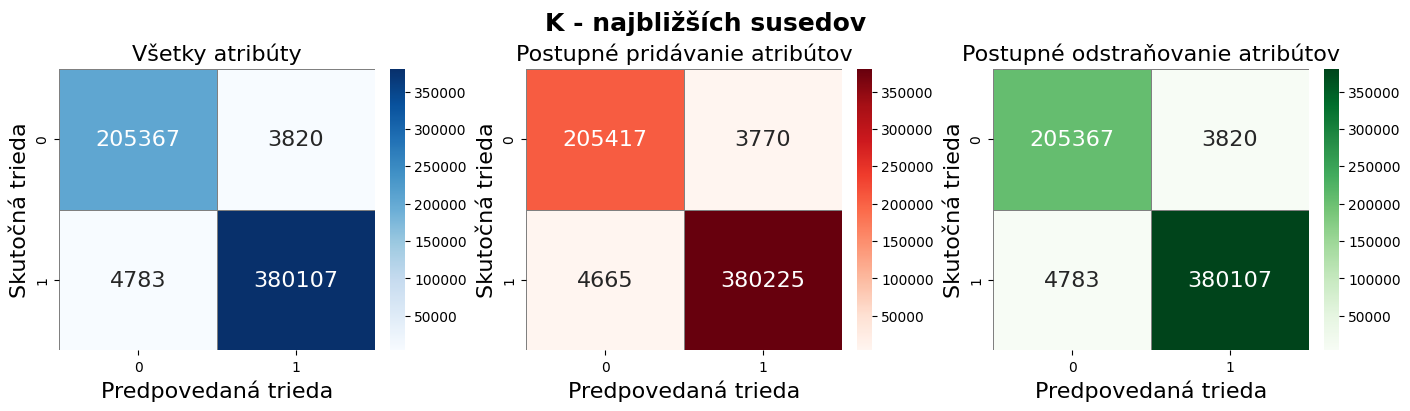

In [82]:
#Vytvorenie mriezky
fig, axs = plt.subplots(1, 3, constrained_layout=True, figsize=(14, 4))

#Nastavenie nazvov matic zamen
fig.suptitle("K - najbližších susedov", fontsize=18, fontweight = "bold")
axs[0].set_title("Všetky atribúty", fontsize=16)
axs[1].set_title("Postupné pridávanie atribútov", fontsize=16)
axs[2].set_title("Postupné odstraňovanie atribútov", fontsize=16)

#Vykreslenie matic zamen
sns.heatmap(cm_KNN, annot=True, fmt="d", cmap="Blues", linewidths=0.5, linecolor="grey", annot_kws={"size": 16}, ax=axs[0])
sns.heatmap(cm_KNN_f, annot=True, fmt="d", cmap="Reds", linewidths=0.5, linecolor="grey", annot_kws={"size": 16}, ax=axs[1])
sns.heatmap(cm_KNN_b, annot=True, fmt="d", cmap = "Greens", linewidths=0.5, linecolor="grey", annot_kws={"size": 16}, ax=axs[2])

#Nastavenie popisov
for ax in axs:
    ax.set_xlabel("Predpovedaná trieda", fontsize=16)
    ax.set_ylabel("Skutočná trieda", fontsize=16)

plt.show()

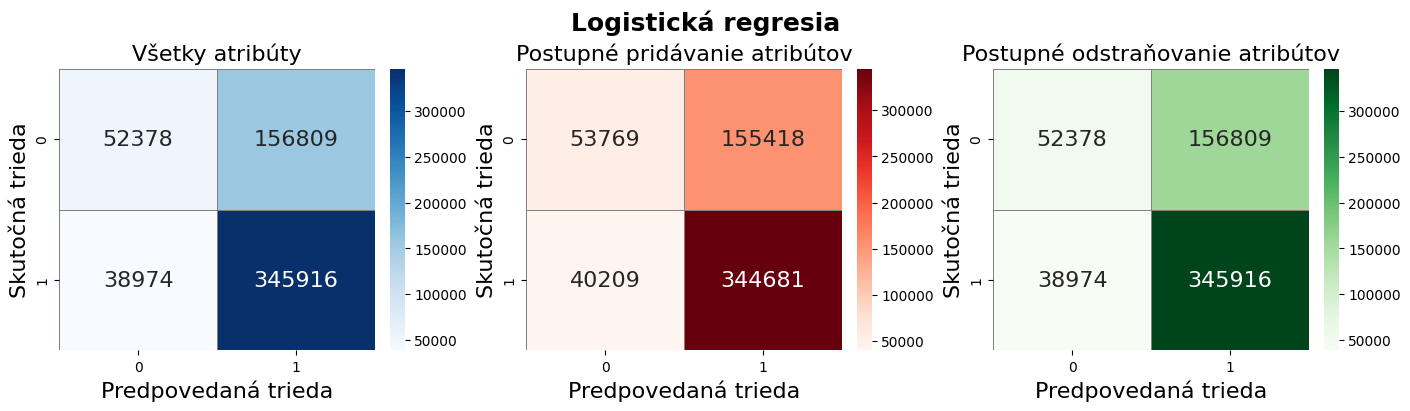

In [89]:
#Vytvorenie mriezky
fig, axs = plt.subplots(1, 3, constrained_layout=True, figsize=(14, 4))

#Nastavenie nazvov matic zamen
fig.suptitle("Logistická regresia", fontsize=18, fontweight = "bold")
axs[0].set_title("Všetky atribúty", fontsize=16)
axs[1].set_title("Postupné pridávanie atribútov", fontsize=16)
axs[2].set_title("Postupné odstraňovanie atribútov", fontsize=16)

#Vykreslenie matic zamen
sns.heatmap(cm_LR, annot=True, fmt="d", cmap="Blues", linewidths=0.5, linecolor="grey", annot_kws={"size": 16}, ax=axs[0])
sns.heatmap(cm_LR_f, annot=True, fmt="d", cmap="Reds", linewidths=0.5, linecolor="grey", annot_kws={"size": 16}, ax=axs[1])
sns.heatmap(cm_LR_b, annot=True,fmt="d", cmap="Greens", linewidths=0.5, linecolor="grey", annot_kws={"size": 16}, ax=axs[2])

#Nastavenie popisov
for ax in axs:
    ax.set_xlabel("Predpovedaná trieda", fontsize=16)
    ax.set_ylabel("Skutočná trieda", fontsize=16)

plt.show()

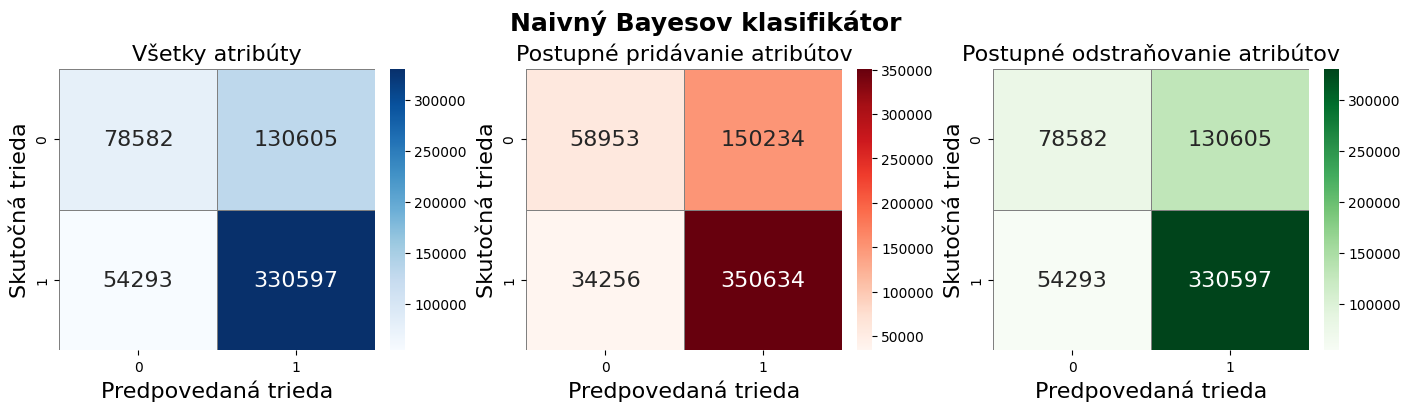

In [88]:
#Vytvorenie mriezky
fig, axs = plt.subplots(1, 3, constrained_layout=True, figsize=(14, 4))

#Nastavenie nazvov matic zamen
fig.suptitle("Naivný Bayesov klasifikátor", fontsize=18, fontweight = "bold")
axs[0].set_title("Všetky atribúty", fontsize=16)
axs[1].set_title("Postupné pridávanie atribútov", fontsize=16)
axs[2].set_title("Postupné odstraňovanie atribútov", fontsize=16)

#Vykreslenie matic zamen
sns.heatmap(cm_NB, annot=True, fmt="d", cmap="Blues", linewidths=0.5, linecolor="grey", annot_kws={"size": 16}, ax=axs[0])
sns.heatmap(cm_NB_f, annot=True, fmt="d", cmap="Reds", linewidths=0.5, linecolor="grey", annot_kws={"size": 16}, ax=axs[1])
sns.heatmap(cm_NB_b, annot=True,fmt="d", cmap="Greens", linewidths=0.5, linecolor="grey", annot_kws={"size": 16}, ax=axs[2])

#Nastavenie popisov
for ax in axs:
    ax.set_xlabel("Predpovedaná trieda", fontsize=16)
    ax.set_ylabel("Skutočná trieda", fontsize=16)

plt.show()

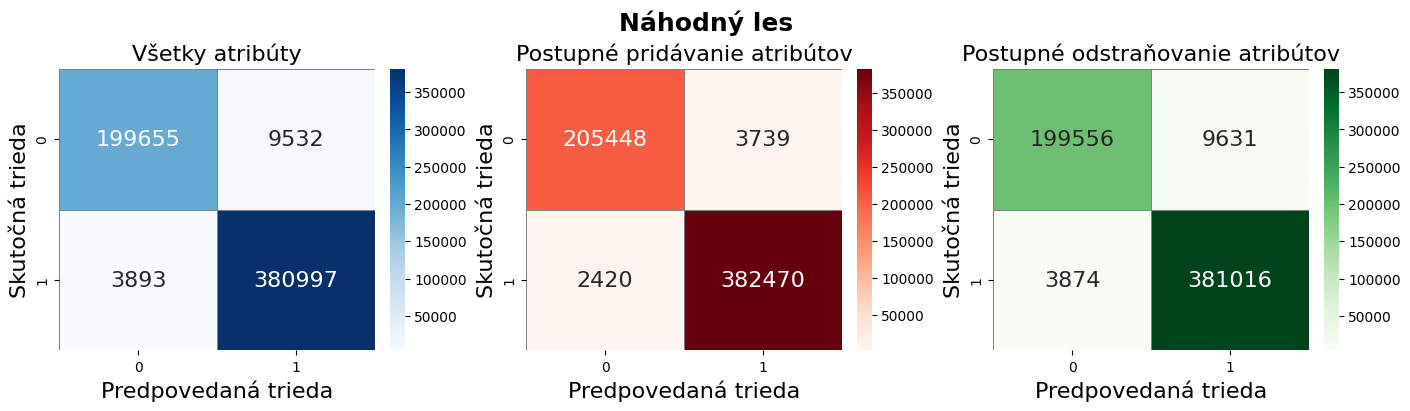

In [93]:
#Vytvorenie mriezky
fig, axs = plt.subplots(1, 3, constrained_layout=True, figsize=(14, 4))

#Nastavenie nazvov matic zamen
fig.suptitle("Náhodný les", fontsize=18, fontweight = "bold")
axs[0].set_title("Všetky atribúty", fontsize=16)
axs[1].set_title("Postupné pridávanie atribútov", fontsize=16)
axs[2].set_title("Postupné odstraňovanie atribútov", fontsize=16)

#Vykreslenie matic zamen
sns.heatmap(cm_RF, annot=True, fmt="d", cmap="Blues", linewidths=0.5, linecolor="grey", annot_kws={"size": 16}, ax=axs[0])
sns.heatmap(cm_RF_f, annot=True, fmt="d", cmap="Reds", linewidths=0.5, linecolor="grey", annot_kws={"size": 16}, ax=axs[1])
sns.heatmap(cm_RF_b, annot=True,fmt="d", cmap="Greens", linewidths=0.5, linecolor="grey", annot_kws={"size": 16}, ax=axs[2])

#Nastavenie popisov
for ax in axs:
    ax.set_xlabel("Predpovedaná trieda", fontsize=16)
    ax.set_ylabel("Skutočná trieda", fontsize=16)

plt.show()

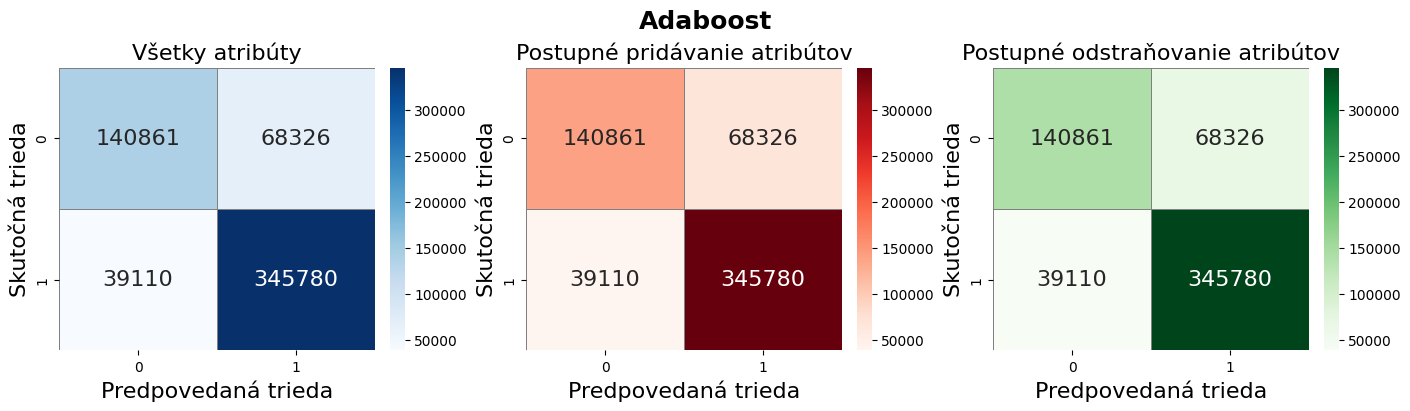

In [84]:
#Vytvorenie mriezky
fig, axs = plt.subplots(1, 3, constrained_layout=True, figsize=(14, 4))

#Nastavenie nazvov matic zamen
fig.suptitle("Adaboost", fontsize=18, fontweight = "bold")
axs[0].set_title("Všetky atribúty", fontsize=16)
axs[1].set_title("Postupné pridávanie atribútov", fontsize=16)
axs[2].set_title("Postupné odstraňovanie atribútov", fontsize=16)

#Vykreslenie matic zamen
sns.heatmap(cm_ABC, annot=True, fmt="d", cmap="Blues", linewidths=0.5, linecolor="grey", annot_kws={"size": 16}, ax=axs[0])
sns.heatmap(cm_ABC_f, annot=True, fmt="d", cmap="Reds", linewidths=0.5, linecolor="grey", annot_kws={"size": 16}, ax=axs[1])
sns.heatmap(cm_ABC_b, annot=True,fmt="d", cmap="Greens", linewidths=0.5, linecolor="grey", annot_kws={"size": 16}, ax=axs[2])

#Nastavenie popisov
for ax in axs:
    ax.set_xlabel("Predpovedaná trieda", fontsize=16)
    ax.set_ylabel("Skutočná trieda", fontsize=16)

plt.show()

In [94]:
#Funkcia na vypisanie MCC a uspesnosti
def mcc_acc(y_test,y_pred,string_model):
    mcc = matthews_corrcoef(y_test, y_pred)
    print(f"MCC pre {string_model} : {mcc:.3f}")
    acc = accuracy_score(y_test, y_pred)
    print(f"Úspešnosť pre {string_model}: {acc:.3f}\n")

In [95]:
#Vypis MCC a uspesnosti
results = {
    "all": {
        "KNN": mcc_acc(y_test, y_pred_KNN, "KNN"),
        "LR": mcc_acc(y_test, y_pred_LR, "LR"),
        "NB": mcc_acc(y_test, y_pred_NB, "NB"),
        "RF": mcc_acc(y_test, y_pred_RF, "RF"),
        "ABC": mcc_acc(y_test, y_pred_ABC, "ABC")
    },
    "f": {
        "KNN": mcc_acc(y_test, y_pred_KNN_f, "KNN_f"),
        "LR": mcc_acc(y_test, y_pred_LR_f, "LR_f"),
        "NB": mcc_acc(y_test, y_pred_NB_f, "NB_f"),
        "RF": mcc_acc(y_test, y_pred_RF_f, "RF_f"),
        "ABC": mcc_acc(y_test, y_pred_ABC_f, "ABC_f")
    },
    "b": {
        "KNN": mcc_acc(y_test, y_pred_KNN_b, "KNN_b"),
        "LR": mcc_acc(y_test, y_pred_LR_b, "LR_b"),
        "NB": mcc_acc(y_test, y_pred_NB_b, "NB_b"),
        "RF": mcc_acc(y_test, y_pred_RF_b, "RF_b"),
        "ABC": mcc_acc(y_test, y_pred_ABC_b, "ABC_b")
    }
}

for key, value in results.items():
    print(f"Category: {key}")

MCC pre KNN : 0.968
Úspešnosť pre KNN: 0.986

MCC pre LR : 0.197
Úspešnosť pre LR: 0.670

MCC pre NB : 0.269
Úspešnosť pre NB: 0.689

MCC pre RF : 0.950
Úspešnosť pre RF: 0.977

MCC pre ABC : 0.594
Úspešnosť pre ABC: 0.819

MCC pre KNN_f : 0.969
Úspešnosť pre KNN_f: 0.986

MCC pre LR_f : 0.200
Úspešnosť pre LR_f: 0.671

MCC pre NB_f : 0.253
Úspešnosť pre NB_f: 0.689

MCC pre RF_f : 0.977
Úspešnosť pre RF_f: 0.990

MCC pre ABC_f : 0.594
Úspešnosť pre ABC_f: 0.819

MCC pre KNN_b : 0.968
Úspešnosť pre KNN_b: 0.986

MCC pre LR_b : 0.197
Úspešnosť pre LR_b: 0.670

MCC pre NB_b : 0.269
Úspešnosť pre NB_b: 0.689

MCC pre RF_b : 0.950
Úspešnosť pre RF_b: 0.977

MCC pre ABC_b : 0.594
Úspešnosť pre ABC_b: 0.819

Category: all
Category: f
Category: b
